In [1]:
import pandas as pd
from citipy import citipy
import matplotlib.pyplot as plt
from random import uniform 
import requests
from pprint import pprint
from config import apikey
import numpy as np
from scipy.stats import linregress

In [2]:
#Initialize list variables which will store weather data
cities = []
weather = []
citylat = []
citylong = []
countries = []
temprature = []
humidity = []
cloudiness = []
wind_speed = []
cnt = 0
random_cities_weather_data_file = "random_cities_weather_data_file.csv"

In [3]:
#build base url for Openweather API with api key 
api_url = "http://api.openweathermap.org/data/2.5/weather?"
base_url = api_url + "appid=" + apikey 


In [4]:
def getweather_data(city_name,country_code):
    url = base_url + "&q=" + city_name + "," + country_code + "&units=imperial"
    city_weather_data_response = requests.get(url)
    city_weather_data = city_weather_data_response.json()
    city_temp = city_weather_data["main"]["temp"]
    city_wind_speed = city_weather_data["wind"]["speed"]
    city_cloudiness = city_weather_data["clouds"]["all"]
    city_humidity = city_weather_data["main"]["humidity"]
    return city_temp,city_wind_speed,city_cloudiness,city_humidity

In [5]:
while cnt < 600:
    long = round(uniform(-180,180),7)              #longitude ranges is from -180 to 180
    lat = round(uniform(-90, 90),7)                #latitude ranges is from -90 to 90
    city = citipy.nearest_city(lat, long)
    city_name = city.city_name
    country_code = city.country_code
    url = base_url + "&q=" + city_name + "," + country_code + "&units=imperial"
    city_weather_data_response = requests.get(url)
    city_weather_data = city_weather_data_response.json()
    if city_weather_data["cod"] != "404":  
        city_temp = city_weather_data["main"]["temp"]
        city_wind_speed = city_weather_data["wind"]["speed"]
        city_cloudiness = city_weather_data["clouds"]["all"]
        city_humidity = city_weather_data["main"]["humidity"]
        #city_temp,city_wind_speed,city_cloudiness,city_humidity = getweather_data(city_name,country_code)
        temprature.append(city_temp) 
        humidity.append(city_humidity)
        cloudiness.append(city_cloudiness)
        wind_speed.append(city_wind_speed)
        cities.append(city_name)
        citylat.append(lat)
        citylong.append(long)
        countries.append(country_code)
        print(f'Collecting Weather Information for city :{city_name} City Number :{cnt}')
        cnt += 1
    else:
        print("City Not Found... skipping")
    
    

City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping


City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping


City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping


City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping


City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping


City Not Found... skipping


In [6]:
#Create dataframe on city weather data
weather_dict = {"City_Name": cities,
                "Country_Code": countries,
                "Latitude": citylat,
                "Longititude": citylong,
                "Temprature": temprature,
                "Humidity" : humidity,
                "cloudiness": cloudiness,
                "wind_speed": wind_speed}
weather_df = pd.DataFrame(weather_dict)

In [7]:
weather_df.to_csv(random_cities_weather_data_file)

In [8]:
weather_df.head(4)

,City_Name,Country_Code,Latitude,Longititude,Temprature,Humidity,cloudiness,wind_speed
0,imbituba,br,-28.978115,-43.747647,69.80,94,75,4.70
1,carnarvon,au,-26.992204,93.881429,77.00,61,3,21.92
2,puerto ayora,ec,-19.320138,-107.931753,69.01,92,100,10.00
3,donghai,cn,22.779405,115.594294,84.00,58,68,1.99


# Part I - WeatherPy
- Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
- Save the plotted figures as .pngs.
#### Latitude vs. Temperature Plot

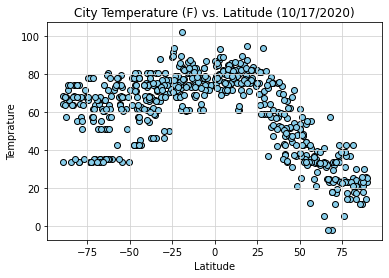

In [9]:
x_axis = weather_df["Latitude"]
y_axis = weather_df["Temprature"]
plt.xlabel("Latitude")
plt.ylabel("Temprature")
plt.title("City Temperature (F) vs. Latitude (10/17/2020)")
plt.grid(b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.scatter(x_axis,y_axis,edgecolors="black",facecolors="skyblue")
plt.savefig("latVstemp.png")
plt.show()

#### Latitude vs. Humidity

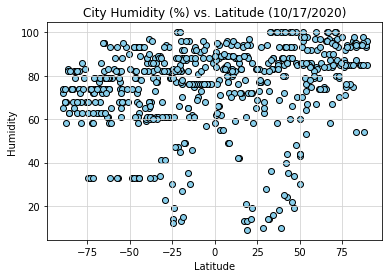

In [10]:
x_axis = weather_df["Latitude"]
y_axis = weather_df["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Humidity (%) vs. Latitude (10/17/2020)")
plt.grid(b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.scatter(x_axis,y_axis,edgecolors="black",facecolors="skyblue")
plt.savefig("latVshumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

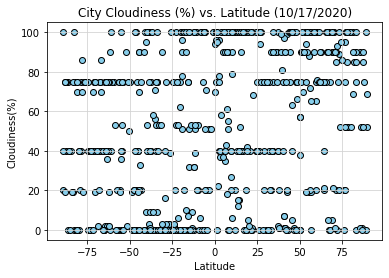

In [11]:
x_axis = weather_df["Latitude"]
y_axis = weather_df["cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Cloudiness (%) vs. Latitude (10/17/2020)")
plt.grid(b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.scatter(x_axis,y_axis,edgecolors="black",facecolors="skyblue")
plt.savefig("latVsclouddiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

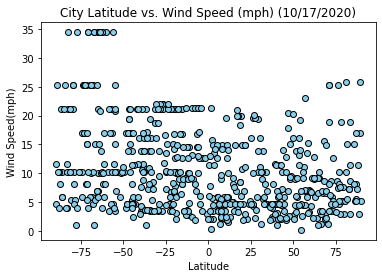

In [12]:
x_axis = weather_df["Latitude"]
y_axis = weather_df["wind_speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title("City Latitude vs. Wind Speed (mph) (10/17/2020)")
plt.scatter(x_axis,y_axis,edgecolors="black",facecolors="skyblue")
plt.savefig("latVswind.png")
plt.show()

# Part 2 - WeatherPy
- Northern Hemisphere (greater than or equal to 0 degrees latitude) 
- Southern Hemisphere (less than 0 degrees latitude)

In [13]:
northern_hemisphere_weather_df = weather_df.loc[weather_df["Latitude"] >=0]
northern_hemisphere_weather_df.reset_index(inplace = True)

In [14]:
southern_hemisphere_weather_df = weather_df.loc[weather_df["Latitude"] < 0]
southern_hemisphere_weather_df.reset_index(inplace = True)

In [15]:
northern_hemisphere_weather_df.head(4)

,index,City_Name,Country_Code,Latitude,Longititude,Temprature,Humidity,cloudiness,wind_speed
0,3,donghai,cn,22.779405,115.594294,84.00,58,68,1.99
1,5,naarden,nl,52.248471,5.123410,47.53,96,70,5.84
2,6,wanning,cn,19.088448,111.385724,76.98,89,100,19.84
3,8,constitucion,mx,14.419923,-122.990392,61.00,42,15,5.01


In [16]:
southern_hemisphere_weather_df.head(4)

,index,City_Name,Country_Code,Latitude,Longititude,Temprature,Humidity,cloudiness,wind_speed
0,0,imbituba,br,-28.978115,-43.747647,69.80,94,75,4.70
1,1,carnarvon,au,-26.992204,93.881429,77.00,61,3,21.92
2,2,puerto ayora,ec,-19.320138,-107.931753,69.01,92,100,10.00
3,4,castro,cl,-46.694578,-84.774860,42.55,93,20,4.70


In [17]:
def run_LinearRegression(xdata,ydata,xlabel,ylabel,labelpos,file_name):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The relation value is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel) 
    plt.scatter(xdata,ydata,edgecolors="black",facecolors="skyblue")
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,labelpos,fontsize=15,color="red")
    plt.savefig(f"{file_name}.png")


#### Northern Hemisphere - Temperature (F) vs. Latitude  Linear Regression
- Plot  Linear Regression Northern Hemisphere - Temperature (F) vs. Latitude

The relation value is: -0.8997913479268373


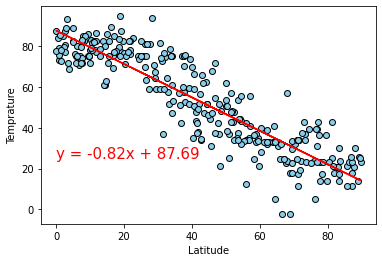

In [18]:
xlabel = "Latitude"
ylabel = "Temprature"
labelpos = (0,25)
file_name = "part2_north_latVStemp"
run_LinearRegression(northern_hemisphere_weather_df[xlabel],northern_hemisphere_weather_df[ylabel],
                     xlabel,ylabel,labelpos,file_name)

Analysis : ->Northern Hemisphere cities have very strong corealation with Temprature. As relation value shows the value -0.89 which is very close to 1 ans also from above graph as cities which are away from equator temporartue of those cities going down as compare to cities which are closer to  equator

###### Southern Hemisphere - Temperature (F) vs. Latitude  Linear Regression
- Plot  Linear Regression Southern Hemisphere - Temperature (F) vs. Latitude

The relation value is: 0.48587030619979515


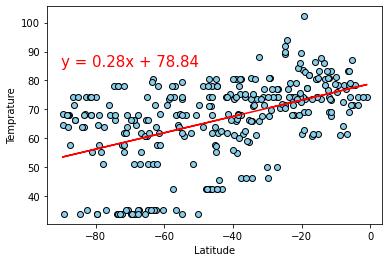

In [19]:
xlabel = "Latitude"
ylabel = "Temprature"
labelpos = (-90,85)
file_name = "part2_south_latVStemp"
run_LinearRegression(southern_hemisphere_weather_df[xlabel],southern_hemisphere_weather_df[ylabel],
                     xlabel,ylabel,labelpos,file_name)

Analysis :-> Southern Hemisphere cities have  strong corealation with Temprature. As relation value shows the value 0.6186852856184885 which is close to 1 also from above graph as cities which are away from equator Temperature of those cities going down as compare to cities which are closer to equator



#### Northern Hemisphere - Humidity (%) vs. Latitude  Linear Regression
- Plot  Linear Regression Northern Hemisphere - Humidity (%) vs. Latitude

The relation value is: 0.20964647315147628


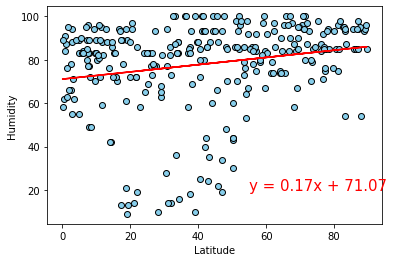

In [20]:
xlabel = "Latitude"
ylabel = "Humidity"
labelpos = (55,20)
file_name = "part2_north_humidityVSlat"
run_LinearRegression(northern_hemisphere_weather_df[xlabel],northern_hemisphere_weather_df[ylabel],
                     xlabel,ylabel,labelpos,file_name)

Analysis : ->Northern Hemisphere cities have week co-realation with Humidity. As relation value shows the value 0.2814 which is very far to 1 ans also from above graph as cities which are away from equator or near to equator does not show much difference in humidity.

#### Southern Hemisphere - Humidity (%) vs. Latitude  Linear Regression
- Plot  Linear Regression Southern Hemisphere - Humidity (%) vs. Latitude

The relation value is: 0.0635247529252761


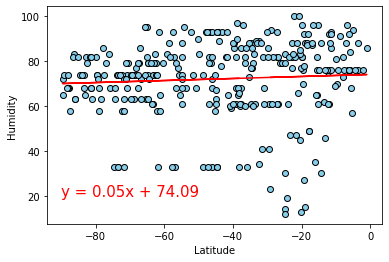

In [21]:
xlabel = "Latitude"
ylabel = "Humidity"
labelpos = (-90,20)
file_name = "part2_south_humidityVSlat"
run_LinearRegression(southern_hemisphere_weather_df[xlabel],southern_hemisphere_weather_df[ylabel],
                     xlabel,ylabel,labelpos,file_name)

Analysis : ->Southern Hemisphere cities have very week co-realation with Humidity. As relation value shows the value -0.00371 which is very very far to 1 ans also from above graph as cities which are away from equator or near to equator does not show much difference in humidity.

#### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
- Plot  Linear Regression Northern Hemisphere - Cloudiness (%) vs. Latitude

The relation value is: 0.06295866375947674


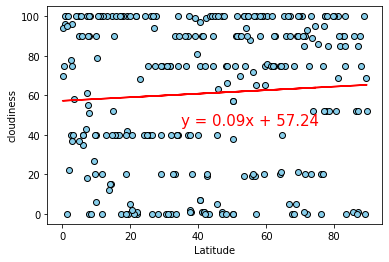

In [22]:
xlabel = "Latitude"
ylabel = "cloudiness"
labelpos = (35,45)
file_name = "part2_north_cloudinessVSlat"
run_LinearRegression(northern_hemisphere_weather_df[xlabel],northern_hemisphere_weather_df[ylabel],
                     xlabel,ylabel,labelpos,file_name)

Analysis : ->Northern Hemisphere cities have very week co-realation with Cloudiness. As relation value shows the value 0.133 which is very far to 1 also from above graph as cities which are away from equator or near to equator does not show much difference in Cloudiness.

#### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
- Plot Southern Hemisphere - Cloudiness (%) vs. Latitude  Linear Regression

The relation value is: 0.0087894831335808


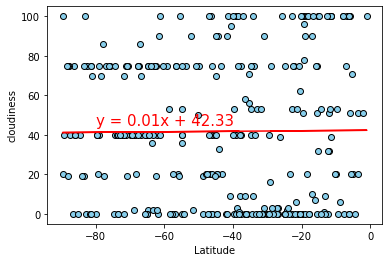

In [23]:
xlabel = "Latitude"
ylabel = "cloudiness"
labelpos = (-80,45)
file_name = "part2_south_cloudinessVSlat"
run_LinearRegression(southern_hemisphere_weather_df[xlabel],southern_hemisphere_weather_df[ylabel],
                     xlabel,ylabel,labelpos,file_name)

Analysis : ->Southern Hemisphere cities have very very week co-realation with Cloudiness. As relation value shows the value -0.030326 which is very very far to 1 also from above graph as cities which are away from equator or near to equator does not show much difference in Cloudiness.

#### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
- Plot Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The relation value is: 0.07747442615344617


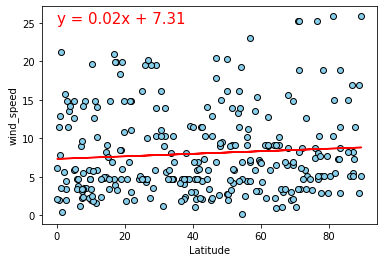

In [24]:
xlabel = "Latitude"
ylabel = "wind_speed"
labelpos = (0,25)
file_name = "part2_north_windspeedVSlat"
run_LinearRegression(northern_hemisphere_weather_df[xlabel],northern_hemisphere_weather_df[ylabel],
                     xlabel,ylabel,labelpos,file_name)

Analysis : ->Northern Hemisphere cities have very week co-realation with Wind Speed. As relation value shows the value 0.06404 which is very very far to 1 also from above graph as cities which are away from equator or near to equator does not show much difference in wind speed.

#### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
- Plot Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The relation value is: -0.1730150110176158


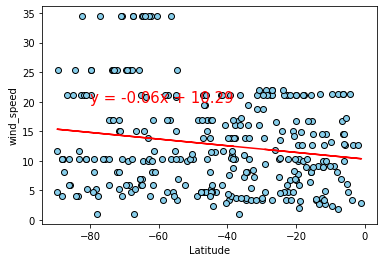

In [25]:
xlabel = "Latitude"
ylabel = "wind_speed"
labelpos = (-80,20)
file_name = "part2_south_windspeedVSlat"
run_LinearRegression(southern_hemisphere_weather_df[xlabel],southern_hemisphere_weather_df[ylabel],
                     xlabel,ylabel,labelpos,file_name)

Analysis : ->Southern Hemisphere cities have very very week co-realation with Wind Speed. As relation value shows the value 0.0206599 which is very very far to 1 also from above graph as cities which are away from equator or near to equator does not show much difference in wind speed.